In [12]:
!pip install pytesseract
!sudo apt install tesseract-ocr


Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  tesseract-ocr-eng tesseract-ocr-osd
The following NEW packages will be installed:
  tesseract-ocr tesseract-ocr-eng tesseract-ocr-osd
0 upgraded, 3 newly installed, 0 to remove and 29 not upgraded.
Need to get 4,816 kB of archives.
After this operation, 15.6 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr-eng all 1:4.00~git30-7274cfa-1.1 [1,591 kB]
Get:2 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr-osd all 1:4.00~git30-7274cfa-1.1 [2,990 kB]
Get:3 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr amd64 4.1.1-2.1build1 [236 kB]
Fetched 4,816 kB in 0s (21.6 MB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debco

In [13]:
import cv2
import os
import numpy as np
import matplotlib.pyplot as plt
import pytesseract
from PIL import Image


In [14]:
data_folder = '/content/drive/MyDrive/Colab Notebooks/Computer Vision/WebCam&Video_blur_&_Text_detection/images_with_text'


image_files = [f for f in os.listdir(data_folder) if f.lower().endswith((".png", ".jpg", ".jpeg", ".webp"))]
print(f"Found {len(image_files)} images in dataset")

Found 4 images in dataset


Extracted text from example1.jpg:
WAITING?
on ae
ZN@ YOUR
? ENGINE
:
--------------------------------------------------


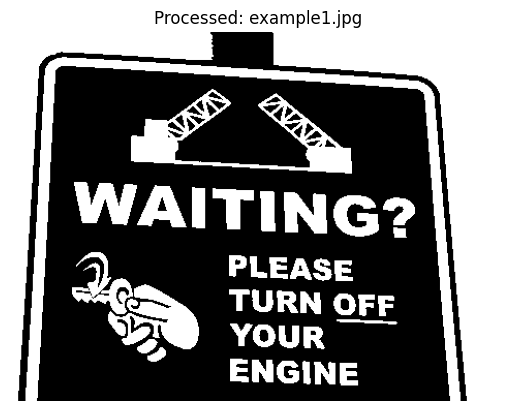

Extracted text from example2.jpg:
(a
. NO IDLING
ZONE
PLEASE TURN ;
rl OFF YOUR CAR }& *
A ENGINE WHILE | &™
~_{] WAITING FOR
‘| STUDENT
|| DISMISSAL _—
:
--------------------------------------------------


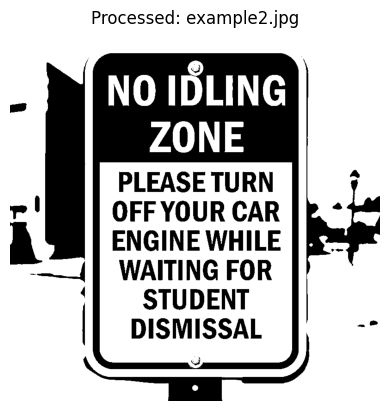

Extracted text from example3.webp:
Ee fh __ -
eee ae.
\ a “A a in a . 3
+e f i Ape i
BS Lgl 4 Vn’ oF f / "
mS oa] ¢ 7 f. ; & a = i
eed week Ma: BNE
neat rn SERIES
FEB 27 hulu | FX
:
--------------------------------------------------


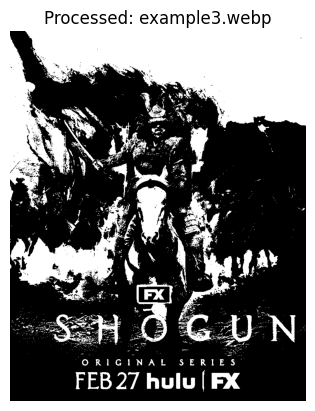

Extracted text from example4.jpg:
Ree
ih er
ea
ran an or wr
wr 4
G all hy
9 i a q
TELL
: . Aaa a 2On /
IN aaein
Hebb oye
aT TICKETS.
ON SALE NOW
:
--------------------------------------------------


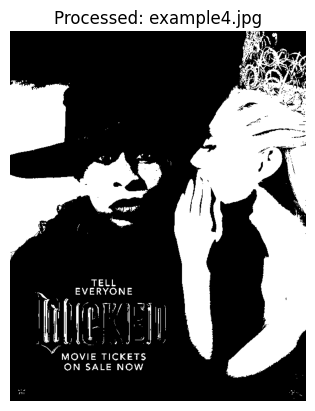

In [15]:
for img_file in image_files:
    img_path = os.path.join(data_folder,img_file)

    image = cv2.imread(img_path)

    gray = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)

    thresh = cv2.threshold(gray,150,255,cv2.THRESH_BINARY + cv2.THRESH_OTSU)[1]

    text = pytesseract.image_to_string(thresh,config="--psm 6")

    print(f"Extracted text from {img_file}:\n{text}:\n{'-'*50}")

    plt.imshow(thresh,cmap="gray")
    plt.axis("off")
    plt.title(f"Processed: {img_file}")
    plt.show()

In [16]:
output_folder = "/content/drive/MyDrive/Colab Notebooks/Computer Vision/WebCam&Video_blur_&_Text_detection/images_with_text_output"
os.makedirs(output_folder,exist_ok=True)

for img_file in image_files:
    img_path = os.path.join(data_folder,img_file)

    image = cv2.imread(img_path)
    gray = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
    thresh = cv2.threshold(gray,150,255,cv2.THRESH_BINARY + cv2.THRESH_OTSU)[1]

    output_path = os.path.join(output_folder,f"Processed_{img_file}")
    cv2.imwrite(output_path,thresh)

print(f"All processed images saved ad {output_folder}")

All processed images saved ad /content/drive/MyDrive/Colab Notebooks/Computer Vision/WebCam&Video_blur_&_Text_detection/images_with_text_output
